In [1]:
%cd ..

/Users/oscargarcia/Desktop/ADMFinal


In [2]:
%ls

ADMCode/          README.md         notebooks/        setup.py
LICENSE           data/             requirements.txt


In [3]:
from __future__ import division
from ADMCode import visualize as vis
from ADMCode import ddm, sdt

import numpy as np
import pandas as pd

from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore")
sns.set(style='white', font_scale=1.3)

%matplotlib inline

## Signal Detection Theory

In [4]:
interactive_plot = interactive(vis.sdt_interact, pH=(0.,1.,.1), pFA=(0.,1.,.1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.8, description='pH', max=1.0), FloatSlider(value=0.1, description='p…

## DDM Parameters

In [5]:
a = .10 # boundary height
v = .14 # strong drift-rate
tr = .25 # nondecision time (in seconds)
z = .5 # starting point ([0,1], fraction of a)

dt = .001 # time stepsize
si = .1 # sigma (noise scalar)
dx = si * np.sqrt(dt) # evidence stepsize (up/down)
deadline = 1.75 # max decision time (in sec)
ntrials = 1000 # number of trials to simulate

parameters = np.array([a, tr, v, z, si, dx, dt])

## Simulate DDM

In [6]:
df, traces = ddm.sim_ddm_trials(parameters, ntrials, deadline)
df.head()

,trial,rt,choice
0,1,0.356,1.0
1,2,0.548,1.0
2,3,0.634,1.0
3,4,0.332,1.0
4,5,0.436,0.0


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df["rt"][0]

0.356

In [9]:
import math

In [10]:

def stdDev(mean,L):
    Sum = 0
    for i in L: 
        Sum+=math.pow((i-mean),2)
    return math.sqrt((Sum/len(L)))
        
    

In [11]:
def CI(mean,stdD,n):
    
    conR = 2 #confidence rating 
    n = math.sqrt(n)
    term = conR*(stdD/n)
    lower = mean-term
    upper = mean+term
    return (lower,upper)

In [12]:
def stats(panDf): 
    y,x = panDf.shape
    Sum = 0
    count =0
    new = []
    while count<y:
        #print(count,y)
        ind = panDf["rt"][count]
        Sum+= ind
        new+=[ind]
        count+=1
    mean = Sum/count
    std = stdDev(mean,new)
    #print(len(new))
    n = len(new)
    conf = CI(mean,std,n)
    return mean,std,conf
    
    
    

In [13]:
rMean = stats(df)

In [14]:
rMean

(0.47215399999999996,
 0.17430872693012253,
 (0.46112974813712965, 0.4831782518628703))

## Analyze simulated behavior

In [15]:
accuracy = df.choice.mean()
corRT = df[df.choice==1].rt.mean()
errRT = df[df.choice==0].rt.mean()

print("RT (cor) = {:.0f} ms".format(corRT/dt))
print("RT (err) = {:.0f} ms".format(errRT/dt))
print("Accuracy = {:.0f}%".format(accuracy*100))

RT (cor) = 471 ms
RT (err) = 479 ms
Accuracy = 81%


In [16]:
abcd = df.rt.values

In [25]:
df

,trial,rt,choice
0,1,0.356,1.0
1,2,0.548,1.0
2,3,0.634,1.0
3,4,0.332,1.0
4,5,0.436,0.0
5,6,0.374,1.0
6,7,0.678,1.0
7,8,0.396,0.0
8,9,0.398,0.0
9,10,0.378,1.0


## Plot evidence traces

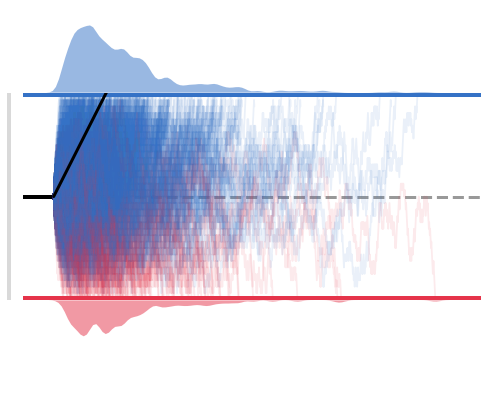

In [17]:
ax = vis.plot_ddm_sims(df, parameters, traces=traces, plot_v=True)

### Use DDM to simulate Yes/No experiment

In [18]:
a = .16 # boundary height
tr = .25 # nondecision time (in seconds)
z = .5 # starting point ([0,1], fraction of a)

vSignal = .18 # drift-rate on signal trials
vNoise = -.1 # drift-rate on noise-only trials

sigParams = np.array([a, tr, vSignal, z, si, dx, dt])
noiseParams = np.array([a, tr, vNoise, z, si, dx, dt])
plist = [sigParams, noiseParams]

In [19]:
sdtData, traces = ddm.ddm_sim_yesno(plist, ntrials, deadline)

In [20]:
sdt.analyze_yesno(sdtData)

Signal Accuracy = 96%
	Hits = 947
	Misses = 44

Noise Accuracy = 84%
	Corr. Rej. = 797
	False Alarms = 157

d-prime (d') = 2.68
criterion (c) = -0.36


## Compare $v_{signal}$ and $v_{noise}$ RTs 

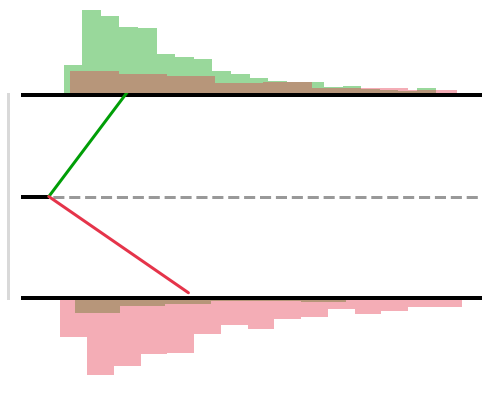

In [21]:
ax = vis.compare_drift_effects(sdtData, plist)

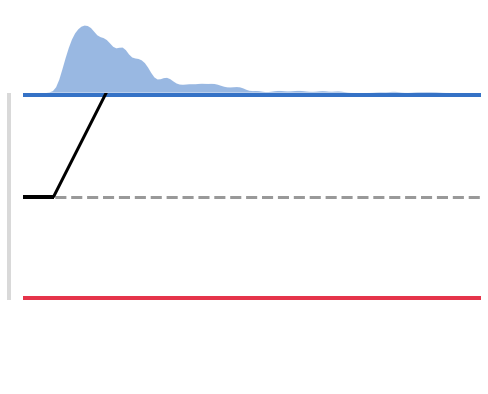

In [24]:
bx = vis.plot_this_sims(df,parameters,plot_v = True)

